In [1]:
%load_ext autoreload

In [2]:
%autoreload 1
import datetime as dt
from graph_tool.all import *
%aimport db_api_parser
#import db_api_parser
%aimport timetable
#import timetable

In [3]:
date = dt.date(2019, 6, 18)
begin = dt.datetime.combine(date, dt.time(0, 0, 0))
end = dt.datetime.combine(date, dt.time(23, 59, 59))

In [4]:
#parser = db_api_parser.db_api_parser("635730573e4f824efa4cd50b81cb0e33")
parser = db_api_parser.db_api_parser("b118565fdce9aeb638ff5d8508cac804")

In [5]:
parser.header = parser.get_header()

In [6]:
eva_numbers = parser.get_eva_numbers('1-2')

In [7]:
len(eva_numbers)

139

In [8]:
trips = parser.get_trips(begin, end, eva_numbers)

Gathering trips from 8000260 at 2019-06-18 20:56:00. Completed 138 of 139 stops. Gathered 879 trips.

Departure board API:
Requests: 606
Timeout: 0
Failed: 36


Journey details API:
Requests: 6934
Timeout: 23
Failed: 2942


879 trips gathered


In [9]:
parser.save_trips_to_file(trips, 'test_trips.json')

In [4]:
t = timetable.timetable(begin, end)
t.load_trips_from_file('test_trips.json')

In [5]:
g = t.generate_graph(1000, 10, 120)

Generating locations from trips
Adding locations for IC 2014                                                   
Generating nodes and vertices from trips
Adding nodes and vertices for IC 2327       
Generating transfer links (transfer time 10 to 120 minutes)


In [6]:
t.print_summary()

Locations: 390
Vertices: 8962
Edges: 19356
On-tranport edges: 8723
Stationary on-tranport edges: 4126
Transfer edges: 10633


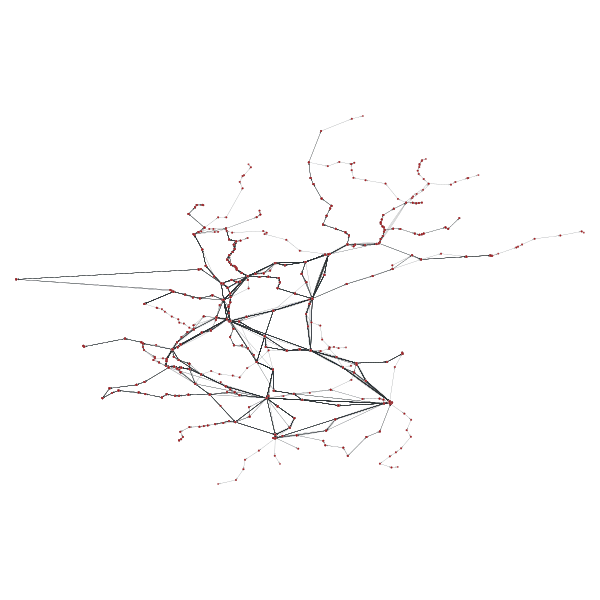

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f88403e2eb8, at 0x7f88000da320>

In [7]:
graph_draw(g, pos=g.vp.pos)

In [13]:
o_name, o_id = t.search_location('Köln')
d_name, d_id = t.search_location('Berlin Hbf')
departure = dt.datetime.combine(begin.date(), dt.time(10, 15))
print('{} to {} departing at {}\n'.format(o_name, d_name, departure))

paths = t.find_route(o_id, d_id, departure)

for i in range(3):
    print(t.path_to_string(paths.next()))
    


Köln Hbf to Berlin Hbf departing at 2019-06-18 10:15:00

2019-06-18 10:41:00 DEP ICE 128 Köln Hbf
2019-06-18 11:05:00 ARR ICE 128 Düsseldorf Hbf
2019-06-18 11:38:00 DEP ICE 728 Düsseldorf Hbf
2019-06-18 12:02:00 ARR ICE 728 Essen Hbf
2019-06-18 12:25:00 DEP IC 1929 Essen Hbf
2019-06-18 12:50:00 ARR IC 1929 Düsseldorf Hbf
2019-06-18 14:38:00 DEP ICE 722 Düsseldorf Hbf
2019-06-18 15:04:00 ARR ICE 722 Essen Hbf
2019-06-18 16:53:00 DEP ICE 727 Essen Hbf
2019-06-18 22:06:00 ARR ICE 727 München Hbf
2019-06-19 00:01:00 DEP ICE 618 München Hbf
2019-06-19 05:33:00 ARR ICE 618 Frankfurt(Main)Hbf
2019-06-19 06:00:00 DEP ICE 998 Frankfurt(Main)Hbf
2019-06-19 11:26:00 ARR ICE 998 Berlin Hbf

2019-06-18 10:41:00 DEP ICE 128 Köln Hbf
2019-06-18 11:23:00 ARR ICE 128 Duisburg Hbf
2019-06-18 11:51:00 DEP ICE 728 Duisburg Hbf
2019-06-18 12:02:00 ARR ICE 728 Essen Hbf
2019-06-18 12:25:00 DEP IC 1929 Essen Hbf
2019-06-18 12:50:00 ARR IC 1929 Düsseldorf Hbf
2019-06-18 14:38:00 DEP ICE 722 Düsseldorf Hbf
201